In [1]:
# Basic & visualization modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn import tree
from sklearn.preprocessing import LabelEncoder as le                    # label encoder
from sklearn.model_selection import train_test_split                    # train & test split 
from sklearn.preprocessing import RobustScaler as rbScaler              # robust scaler
from sklearn.ensemble import VotingClassifier as voClassifier           # voting
from sklearn.tree  import DecisionTreeClassifier as dtClassifier        # decision tree
from sklearn.ensemble import AdaBoostClassifier as adabClassifier       # adaboosting
from sklearn.neighbors import KNeighborsClassifier as knnClassifier     # knn
from sklearn.ensemble import RandomForestClassifier as rfClassifier     # random forest
from sklearn.linear_model import LogisticRegression as lgrClassifier    # logistic regression
from sklearn.ensemble import GradientBoostingClassifier as gbClassifier # gbm

OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k
OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k


# Reading the CSV file

In [2]:
data = pd.read_csv("../data/train.csv", encoding = "utf-8" , sep = ",", low_memory=False)

In [3]:
rows = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for row in rows:
    data[row] = data[row].str.replace(r'_+', '')

In [4]:
for row in rows:
    data[row] = pd.to_numeric(data[row], errors='coerce')

# Handle missing values

In [17]:
data.dropna(thresh=26, inplace=True)

## 1,744 missing Rows were removed to handle some missing values 1.7%

In [6]:
data = data[['Month', 'Age', 'Occupation','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score']]

## Handle Monthly_Inhand_Salary missing values

In [22]:
fill_list = data['Monthly_Inhand_Salary'].dropna().tolist()
data['Monthly_Inhand_Salary'] = data['Monthly_Inhand_Salary'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

<Figure size 864x576 with 0 Axes>

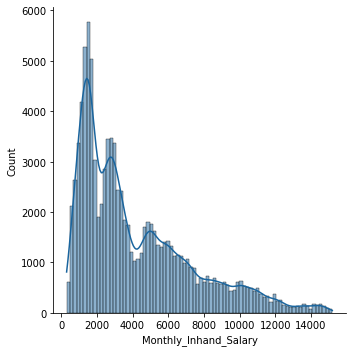

In [23]:
plt.figure(figsize=(12,8))
sns.displot(data=data, x="Monthly_Inhand_Salary", kde=True, color="#1a659e")

## Handle Type_of_Loan missing values

In [24]:
fill_list = data['Type_of_Loan'].dropna().tolist()
data['Type_of_Loan'] = data['Type_of_Loan'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Num_of_Delayed_Payment missing values

In [25]:
fill_list = data['Num_of_Delayed_Payment'].dropna().tolist()
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Changed_Credit_Limit missing values

In [26]:
fill_list = data['Changed_Credit_Limit'].dropna().tolist()
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Num_Credit_Inquiries missing values

In [27]:
fill_list = data['Num_Credit_Inquiries'].dropna().tolist()
data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Credit_History_Age missing values

In [28]:
fill_list = data['Credit_History_Age'].dropna().tolist()
data['Credit_History_Age'] = data['Credit_History_Age'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Amount_invested_monthly missing values

In [29]:
fill_list = data['Amount_invested_monthly'].dropna().tolist()
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Monthly_Balance missing values

In [30]:
fill_list = data['Monthly_Balance'].dropna().tolist()
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

In [7]:
data.dropna(thresh=24, inplace=True)

In [8]:
data.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# Encode categorical values

In [10]:
data.select_dtypes(['object']).columns

Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [11]:
Month_le = le()
Occupation_le = le()
Type_of_Loan_le = le()
Credit_Mix_le = le()
Credit_History_Age_le = le()
Payment_of_Min_Amount_le = le()
Payment_Behaviour_le = le()
Credit_Score_le = le()

In [12]:
data['Month'] = Month_le.fit_transform(data['Month'])
data['Occupation'] = Occupation_le.fit_transform(data['Occupation'])
data['Type_of_Loan'] = Type_of_Loan_le.fit_transform(data['Type_of_Loan'])
data['Credit_Mix'] = Credit_Mix_le.fit_transform(data['Credit_Mix'])
data['Credit_History_Age'] = Credit_History_Age_le.fit_transform(data['Credit_History_Age'])
data['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(data['Payment_of_Min_Amount'])
data['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(data['Payment_Behaviour'])
data['Credit_Score'] = Credit_Score_le.fit_transform(data['Credit_Score'])

In [13]:
mdf = data[['Credit_Score','Changed_Credit_Limit', 'Payment_of_Min_Amount', 'Credit_Mix', 'Delay_from_due_date', 'Annual_Income', 'Monthly_Inhand_Salary', 'Age', 'Monthly_Balance', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Payment_Behaviour', 'Credit_History_Age', 'Num_Bank_Accounts', 'Credit_Utilization_Ratio']]

# Modeling

In [14]:
x = mdf.drop(['Credit_Score'] , axis = 1).values
y = mdf['Credit_Score' ].values

# Split Data

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)
[x_train.shape, y_train.shape]

[(43275, 14), (43275,)]

# Data Scaling using Robust Scaler

In [16]:
ro_scaler = rbScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)
[x_train.shape, x_test.shape]

[(43275, 14), (14425, 14)]

# Random Forest Classifier

In [22]:
rf = rfClassifier(max_features= 14, max_depth= 8)

In [23]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=8, max_features=14)

In [24]:
rf_score = rf.score(x_train , y_train)

In [26]:
rf_score_t = rf.score(x_test , y_test)
print(rf_score_t)

0.6910918544194108
